<a href="https://colab.research.google.com/github/amanpatelll/MACHINE_LEARNING_PROJ-S/blob/LINEAR-REGRESSION/Car_Price_Prediction_linearRegression_aman.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Starting linear regression project 1 -
CAR PRICE PREDICTION .
Dataset is obtained from kaggle.



Importing packages below -
- train_test_split helps to divide the dataset into 2 sets ( 1 is used for training the machine learning model and the other one is used for testing the model )
- linear model imports linear regression directly , so you don't need to perform linear regression completely
- lasso is a feature of the sklearn module which helps to compute lasso regression ( this helps in regularization cases ) .

In [43]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn import metrics # helps to analyse the machine learning model using different comparisions methods

 Data collection and Processing -
 Creating a dataframe of the car_data.csv file

In [44]:
path='/content/car_data.csv' # this is the copied path
df=pd.read_csv(path)
print(df) # printing the dataframe

    Car_Name  Year  Selling_Price  Present_Price  Kms_Driven Fuel_Type  \
0       ritz  2014           3.35           5.59       27000    Petrol   
1        sx4  2013           4.75           9.54       43000    Diesel   
2       ciaz  2017           7.25           9.85        6900    Petrol   
3    wagon r  2011           2.85           4.15        5200    Petrol   
4      swift  2014           4.60           6.87       42450    Diesel   
..       ...   ...            ...            ...         ...       ...   
296     city  2016           9.50          11.60       33988    Diesel   
297     brio  2015           4.00           5.90       60000    Petrol   
298     city  2009           3.35          11.00       87934    Petrol   
299     city  2017          11.50          12.50        9000    Diesel   
300     brio  2016           5.30           5.90        5464    Petrol   

    Seller_Type Transmission  Owner  
0        Dealer       Manual      0  
1        Dealer       Manual      0

 Printing the 'n' no of rows of the dataset as shown below


In [45]:
n=5
df.head(n)

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


- As shown below the dataset has 9 features and around 300 examples .

In [46]:
df.shape

(301, 9)

In [47]:
# printing information on the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Kms_Driven     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Seller_Type    301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


In [48]:
# checking the number of missing values
df.isnull().sum()
# the below output will show that there are no missing values in this datatset


Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Kms_Driven       0
Fuel_Type        0
Seller_Type      0
Transmission     0
Owner            0
dtype: int64

In [49]:
# checking the distribution of categorical data
print(df.Fuel_Type.value_counts())
print(df.Seller_Type.value_counts())
print(df.Transmission.value_counts())

Fuel_Type
Petrol    239
Diesel     60
CNG         2
Name: count, dtype: int64
Seller_Type
Dealer        195
Individual    106
Name: count, dtype: int64
Transmission
Manual       261
Automatic     40
Name: count, dtype: int64


Now , we perform one hot encoding of the data . This is very important since some of the values of the dataset are in continous form i.e not integers . The machine Learning model won't be able to assess these values and so we need to convert them into integer values ( THIS IS CALLED ONE - HOT - ENCODING )

In [50]:
# encoding the categorical data
# 1 - fuel_type column
df.replace({'Fuel_Type':{'Petrol':0,'Diesel':1,'CNG':2}},inplace=True)
# 2 - Seller_Type column
df.replace({'Seller_Type':{'Dealer':0,'Individual':1}},inplace=True)
# 3 - Transmission column
df.replace({'Transmission':{'Manual':0,'Automatic':1}},inplace=True)
# printing the first 5 rows of the shit
df.head()
# in the first 5 rows of the encoded dataset you can observe that the all the continous values have been converted to integers
# ONE-HOT-ENCODING SUCESSFULL!!

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,0,0,0,0
1,sx4,2013,4.75,9.54,43000,1,0,0,0
2,ciaz,2017,7.25,9.85,6900,0,0,0,0
3,wagon r,2011,2.85,4.15,5200,0,0,0,0
4,swift,2014,4.60,6.87,42450,1,0,0,0


Splitting the data into Train and Test datasets and creating X and Y sets -
The train and test datasets are created using the train_test_split function that is already imported at the start .
test_size decides the percent of the data that is to be stored into the test_data .

In [51]:
X = df.drop(['Car_Name','Selling_Price'],axis=1)
Y = df['Selling_Price']
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.2,random_state=3)


Model Training
1. - Linear Regression - easily done by the LinearRegression model that is impoerted at the wstart of the colab . Then you fit the train sets ( x and y ) into the linear regression model using "fit" .

In [52]:
# loading the linear regression model
lin_reg_model=LinearRegression()

In [53]:
lin_reg_model.fit(X_train,Y_train)

LinearRegression()

Model Evaluation  
- predict the values of seller_prie using "predict" that is already estabilished in the lin_reg_model
- calculate the r^2 error between the true seller_prices and the predicted values .
-( you can compare the y_true and y_pred values by various methods such as r^2 , mse or rms . We are using r^2 in this case ( you can call these different types using the metrics module that was imported at the start only ))

In [54]:
# prediction on training data
training_data_prediction=lin_reg_model.predict(X_train)
print(training_data_prediction)
# below shown values are the predicted seller_prices of the X_train set .
# these values are predicted using linear regression

[ 1.11622611 -3.59520237  2.17889565  0.89993565  8.90331468  6.84060654
 21.61980196 -2.79636211 16.63265123  2.87544051  6.37400434  2.12408159
  2.82816144  0.84074698  3.58135648  7.54611495  3.5982973   3.72584552
 -0.75706968  1.53790855 -1.39326912  7.22102342  6.00652788  1.25165891
  0.85735109  8.38834476  2.46309574  0.35169978  1.99789066  2.39892623
 -0.8378697  -0.08977697  7.84036518  6.55496192  6.32295207  5.50176561
  4.62911436  1.8649885   7.34004494  2.0087903   9.71661647  1.40759218
  6.5619833   9.10468541  8.88378402  3.19653814  8.29061722 10.189688
  4.36577165  4.40451816  8.29715661  0.49558343  5.87057841  4.90096467
  0.29333887  4.50562257  3.40951216  6.3780733   4.34721202  9.04729735
  4.48730843  1.46571601  7.90295345 -2.87583057  0.45306037  4.36938394
  7.51967277  1.91350309  7.77409721  6.51343855  1.58860769  9.65498721
 -2.34303243  3.09557689 20.48268836  2.60741571  5.23854126  0.04991186
  8.38834476  4.71787104  0.73886482  9.085177   18.1

In [55]:
# R square error
error_score=metrics.r2_score(Y_train,training_data_prediction)
print("r squared error comes out to be=",error_score)

r squared error comes out to be= 0.8850493456998677


Visualizing the actual and the predicted prices - using matplotlib package

<function matplotlib.pyplot.show(close=None, block=None)>

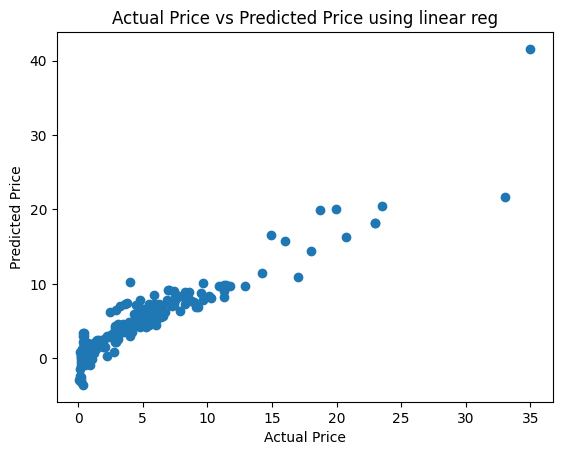

In [56]:
plt.scatter(Y_train,training_data_prediction)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Actual Price vs Predicted Price using linear reg")
plt.show

The half project is completed .... I'd say more than half .
Now the only thing that is left is to implement the linear regression model on the test dataset .

In [57]:
# prediction on test data
testing_data_prediction=lin_reg_model.predict(X_test)
print(testing_data_prediction)
# below shown values are the predicted seller_prices of the X_test set .
# these values are predicted using linear regression

[ 1.38140988  5.1946483   5.23175978  2.46931124 -1.8342561   7.74154604
 14.38131908  2.11393547  7.99270714  4.27942083 10.11732329 -1.76439701
  3.94010228  2.07005563  3.77414909  8.20198976  0.76352966  2.24713827
  2.33623966  1.78316519 -1.90261518  2.66443316  1.45454178 -1.06173313
  3.40794717  4.85464512 11.06358783 10.28702076  5.71082625  1.22905315
  5.89228761  8.98678491  2.49416475  1.45193347  3.99543226  6.02381712
  6.5605926   4.9799915   5.15806472  1.82390395  9.1804054   2.03121514
 16.82878307  4.26298326  1.61602001 -0.14572835  2.29090951  2.28549954
  0.0268383  16.71458872  1.53962659  5.45555616  6.23240118  2.02832265
  5.87231251  2.1024589   4.32470435  5.67350292  3.61750894  3.79116208
  2.99830812]


In [58]:
# R square error
error_score=metrics.r2_score(Y_test,testing_data_prediction)
print("r squared error comes out to be=",error_score)

r squared error comes out to be= 0.8434910870906724


<function matplotlib.pyplot.show(close=None, block=None)>

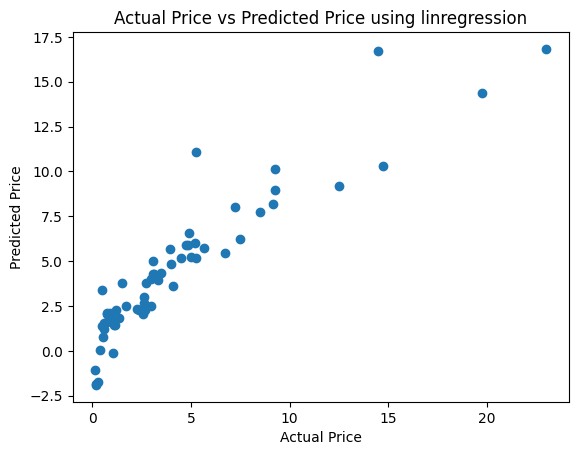

In [59]:
plt.scatter(Y_test,testing_data_prediction)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Actual Price vs Predicted Price using linregression")
plt.show

Lasso Regression -

In [60]:
# loading the linear regression model
lass_reg_model=Lasso()
lass_reg_model.fit(X_train,Y_train)
# prediction on training data
training_data_prediction=lass_reg_model.predict(X_train)
print(training_data_prediction)
# below shown values are the predicted seller_prices of the X_train set .
# these values are predicted using lasso regression


[ 1.77945406e+00 -2.06552576e+00  2.20857555e+00  1.64999485e+00
  7.76129788e+00  6.82073035e+00  2.03203719e+01 -3.18334571e+00
  1.53004274e+01  2.67067139e+00  4.97462602e+00  2.18485930e+00
  2.74870149e+00  1.56962738e+00  3.71674243e+00  6.03076249e+00
  4.13255864e+00  3.73907297e+00  1.61644212e-01  2.11710479e+00
  2.59512819e-01  5.66596211e+00  4.57939529e+00  1.82882593e+00
  1.48771342e+00  7.03464825e+00  3.05674122e+00  1.13535749e+00
  2.53006051e+00  2.98095277e+00  1.52999345e-01  8.71025265e-01
  8.85416112e+00  5.04141619e+00  4.76541345e+00  4.07063219e+00
  3.22565207e+00  2.50561730e+00  7.78171394e+00  2.42485888e+00
  8.40614317e+00  2.11085027e+00  5.31217181e+00  9.93026219e+00
  7.86409421e+00  3.39590033e+00  7.12932086e+00  1.01018995e+01
  4.23869315e+00  4.81047849e+00  8.60908713e+00  1.32815033e+00
  4.39514050e+00  3.41557751e+00  1.09521848e+00  4.40439009e+00
  2.41993614e+00  4.97865622e+00  4.35264313e+00  9.87342084e+00
  4.49412274e+00  2.04492

r squared error comes out to be= 0.8489270481716822


<function matplotlib.pyplot.show(close=None, block=None)>

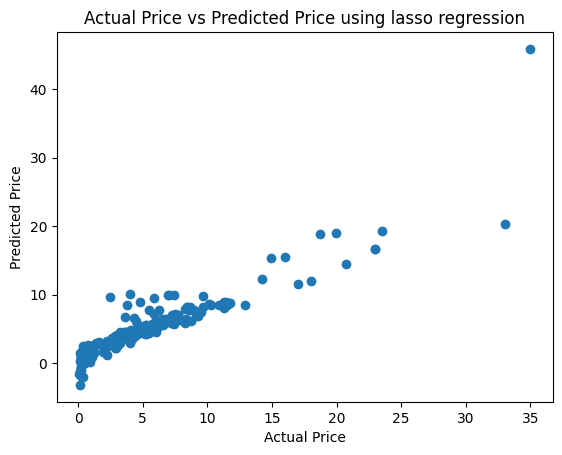

In [61]:
# R square error
error_score=metrics.r2_score(Y_train,training_data_prediction)
print("r squared error comes out to be=",error_score)
plt.scatter(Y_train,training_data_prediction)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Actual Price vs Predicted Price using lasso regression")
plt.show

In [62]:
# loading the linear regression model
lass_reg_model=Lasso()
lass_reg_model.fit(X_test,Y_test)
# prediction on training data
test_data_prediction=lass_reg_model.predict(X_test)
print(test_data_prediction)
# below shown values are the predicted seller_prices of the X_test set .
# these values are predicted using lasso regression


[ 0.94427345  4.5408422   5.60057042  2.97185026 -0.82350506  8.60796553
 15.4985256   2.00947988  6.84584199  3.74369815 11.49317177 -3.73857212
  4.86147054  1.92409483  3.74880866  9.03217801  1.05181678  2.18522452
  2.74622595  1.85666234 -1.05829969  2.92846982  1.6196537  -0.25622178
  1.67446319  4.54289779 12.51620026  9.95985766  5.52984519  1.30735676
  4.21771563  7.65990406  2.54404267  1.60905519  3.36790966  4.80013166
  4.6336442   3.59002954  4.96279856  2.07521649  8.57086471  1.84210971
 16.79554073  3.67690633  1.60722104  0.55528637  2.12464453  2.67791555
  0.90190544 17.50253444  1.25034974  5.68381213  6.65692126  1.75451867
  4.1416033   1.96284644  3.30776427  3.54938659  4.24208573  3.20646316
  2.34402563]


r squared error comes out to be= 0.8396320792903865


<function matplotlib.pyplot.show(close=None, block=None)>

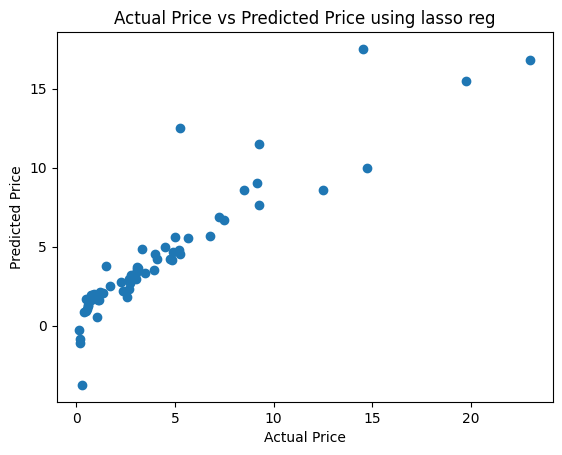

In [63]:
# R square error
error_score=metrics.r2_score(Y_test,test_data_prediction)
print("r squared error comes out to be=",error_score)
plt.scatter(Y_test,test_data_prediction)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Actual Price vs Predicted Price using lasso reg")
plt.show

### NOTE -- AS LONG AS YOU SEE A GRAPH SIMILAR TO X=Y , YOU CAN COME TO THE CONCLUSION THAT THE MODEL IS WORKING WELL , AS THAT MEANS THAT THE PREDICTED VALUE OF SELLER_PRICE IS ALMOST EQUAL TO THE ACTUAL VALUE OF IT .